# **Descrição da Base de Dados**
Transações de uma loja de varejo on-line sediada no Reino Unido.

# **Objetivos da Análise**

1. Identificar os períodos com maiores números de tramsações.
2. Analisar quais produtos são mais populares e quais podem ter problemas de devolução.

# **Dicionário**
- **InvoiceNo:** Número da fatura. Um número integral de 6 dígitos atribuído exclusivamente a cada transação. Se este código começar com a letra 'c', indica um cancelamento.

- **StockCode:** Código do produto. Uma numeração atribuída exclusivamente a cada produto distinto.

- **Description:** Nome do produto.

- **Quantity:** As quantidades de cada produto por transação.

- **InvoiceDate:** O dia e a hora em que cada transação foi realizada.

- **UnitPrice:** Preço unitário. Preço do produto por unidade.

- **CustomerID:** ID do cliente. Um número integral de 5 dígitos atribuído exclusivamente a cada cliente.

- **Country:** O nome do país onde cada cliente reside.

📊**Baixe esse dataset gratuitamente na plataforma do Kaggle:**

https://www.kaggle.com/datasets/ulrikthygepedersen/online-retail-dataset/data


# **1 Inspeção Geral**

Nessa etapa, o dataframe será inspecionado afim de entendermos quais dados são apresentados, seu contexto e quais perguntas ele pode nos responder.

In [358]:
#Importando biblioteca e o dataframe
import pandas as pd

loja=pd.read_csv('/content/online_retail.csv')

#Inspeção Geral
display(loja.head())
display(loja.info())

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


None

# **2 Limpeza dos Dados**








**2.1 Removendo valores nulos:**

Conforme observamos ao utilizar o método "info()", as únicas colunas que possuem valores nulos são as colunas "Description" e "CustomerID".

Podemos confirmar isso retornando a **quantidade de valores nulos** em cada uma dessas colunas da seguinte forma:

In [359]:
display(loja['Description'].isnull().sum())
display(loja['CustomerID'].isnull().sum())

1454

135080

Agora deletaremos apenas as linhas com valores nulos da coluna "CustomerID". Já as linhas com valores nulos na coluna "Description" serão mantidos, pois os produtos desse loja também podem ser identificados pela coluna "StockCode".

In [360]:
loja=loja.dropna(subset=['CustomerID'])

**2.2 Removendo Colunas Inúteis**

Tendo em vista que a coluna que será utilizada para identificarmos os produtos dessa loja será a "StockCode", a qual não possui valores nulos, iremos deletar a coluna "description", que acabará não tendo utilidade em nossa análise.

In [361]:
loja=loja.drop('Description',axis=1)

**2.3 Alterando Tipo:**

Para finalizar essa parte de limpeza dos dados, iremos colocar a coluna "InvoiceDate" no formato **datetime**.

In [362]:
loja['InvoiceDate']=pd.to_datetime(loja['InvoiceDate'])

**2.4 Remoção de Registros Duplicados:**

Transações duplicadas podem introduzir vieses nas métricas de vendas. Por isso, iremos **verificar** a existência de registros duplicados e **deletá-los** do nosso dataframe caso existam.

In [363]:
#Verificando a existência de registros duplicados
loja.duplicated().sum()

5227

In [364]:
#Remoção de registros duplicados, com exceção da primeira ocorrência
loja=loja.drop_duplicates(keep='first')

# **3 Análise Exploratória**


**3.1 Em quais períodos podemos encontrar os maiores números de transações?**

Para responder a essa pergunta, será necessário criar duas novas colunas que contenham as informações de mês e ano da coluna "InvoiceDate". Assim, poderemos explorar esses dados com maior liberdade.

Após essa etapa, precisamos identificar os valores distintos da coluna "Ano", que são 2010 e 2011.

Observe isso sendo aplicado no código abaixo:

In [365]:
#Extraindo informações de data/criando novas colunas
loja['Ano']=loja['InvoiceDate'].dt.year
loja['Mês']=loja['InvoiceDate'].dt.month

#Descobrindo os valores destintos da coluna "Ano"
loja['Ano'].unique()

<ipython-input-365-db3aea3b0d14>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loja['Ano']=loja['InvoiceDate'].dt.year
<ipython-input-365-db3aea3b0d14>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loja['Mês']=loja['InvoiceDate'].dt.month


array([2010, 2011], dtype=int32)

O aviso **SettingWithCopyWarning** acima ocorre porque estamos trabalhando com uma cópia de uma fatia do DataFrame original, após a remoção dos registros duplicados no tópico anterior. No entanto, isso não causará nenhum problema durante a análise, portanto, podemos prosseguir sem preocupações.

Uma observação importante é que os dados referentes ao ano de 2010 dessa empresa estão **incompletos**, pois temos acesso apenas ao mês de dezembro. Isso limita nossa análise e pode afetar a precisão dos resultados.

Você pode verificar essa informação executando o código abaixo.

In [366]:
# Filtrando as transações de 2010
transacoes_2010 = loja[loja['Ano'] == 2010].groupby('Mês').count()
transacoes_2010

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Ano
Mês,,,,,,,,
12,26354,26354,26354,26354,26354,26354,26354,26354



Portanto, **utilizaremos apenas os dados do ano de 2011**.

O próximo passo é criar uma variável chamada **transacoes_2011** para armazenar a quantidade mensal de transações desse ano. Nessa variável, não incluiremos cancelamentos ou devoluções; para isso, basta removermos da coluna "InvoiceNo" qualquer transação que comece com a letra "C".

In [367]:
#Filtrando as transações de 2011
transacoes_2011=loja[~loja['InvoiceNo'].str.startswith('C')]
transacoes_2011=transacoes_2011[transacoes_2011['Ano']==2011].groupby('Mês').count()
transacoes_2011=transacoes_2011['InvoiceNo']
transacoes_2011

,InvoiceNo
Mês,
1,20991
2,19707
3,26872
4,22435
5,28074
6,26926
7,26582
8,26796
9,39671



Da mesma forma, criaremos uma variável chamada **cancelamentos_2011**, que armazenará a quantidade mensal de cancelamentos do ano de 2011.

In [368]:
#Filtrando os cancelamentos de 2011
cancelamentos_2011=loja[loja['InvoiceNo'].str.startswith('C')]
cancelamentos_2011=cancelamentos_2011[cancelamentos_2011['Ano']==2011].groupby('Mês').count()
cancelamentos_2011=cancelamentos_2011['InvoiceNo']

Vamos observar o número de transações de cada mês para obter uma visão dos **períodos de maior e menor demanda da empresa**. Como se trata de uma análise comparativa, os gráficos que melhor atendem essa visualização são: o gráfico de linhas e o gráfico de colunas. Utilizaremos ambos para enriquecer a análise.

<Axes: xlabel='Mês', ylabel='Qtd. de Transações'>

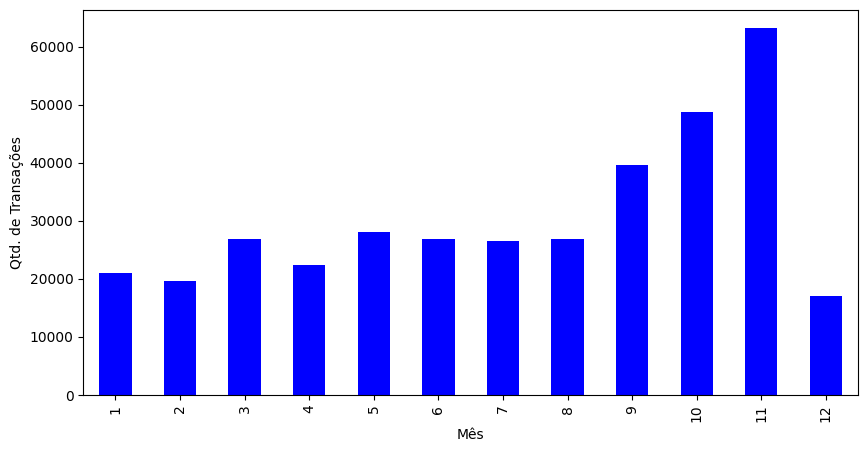

In [369]:
transacoes_2011.plot(kind='bar',figsize=(10,5),ylabel='Qtd. de Transações', color='blue')

<Axes: xlabel='Mês', ylabel='Qtd. de Transações'>

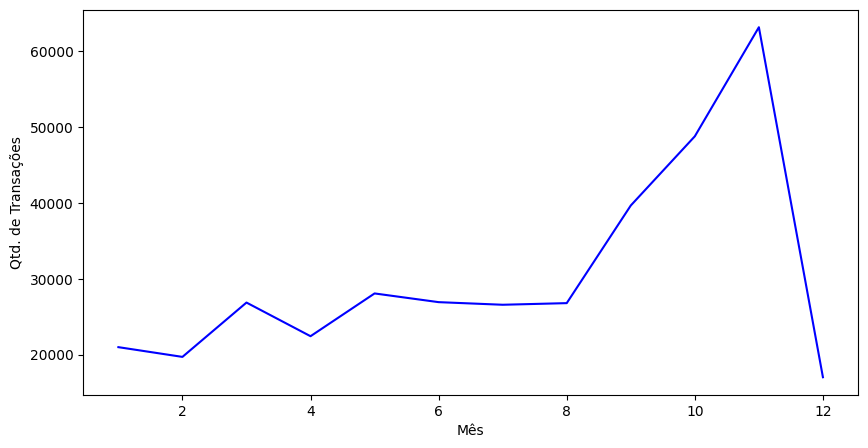

In [370]:
transacoes_2011.plot(figsize=(10,5),ylabel='Qtd. de Transações', color='blue')

Podemos observar que houve um **crescimento significativo** no número de transações a partir de setembro, **atingindo seu ápice em novembro**.

Entretanto, em dezembro, ocorreu uma **queda abrupta** no número de transações, fazendo desse **o mês com o menor volume do ano** — inferior até mesmo à média de transações do período de janeiro a agosto.

Podemos resumir da seguinte forma:

- A média de transações de janeiro a agosto foi de 24.798.
- Em setembro, a empresa alcançou 39.671 transações, representando 14.873 transações a mais que a média dos meses anteriores, com o pico em novembro, chegando a 63.181 transações.
- Em dezembro, houve uma queda significativa no número de transações, totalizando apenas 17.026, o que corresponde a 7.772 transações a menos do que a média de janeiro a agosto.
Observe esses dados através do código abaixo:

In [371]:
print(f'Média de transações de janeiro a agosto = {transacoes_2011[0:8].mean().round()}')
print(f'Número de transações de setembro = {transacoes_2011[9]}')
print(f'Diferença entre o número de transações do mês de setembro e a média de transações dos meses anteriores = {transacoes_2011[9]-transacoes_2011[0:8].mean().round()}')
print(f'Número de transações do mês de novembro = {transacoes_2011[11]}')
print(f'Número de transações no mês de dezembro = {transacoes_2011[12]}')
print(f'Diferença entre o número de transações do mês de dezembro e a média de transações dos meses anteriores = {transacoes_2011[0:8].mean().round()-transacoes_2011[12]}')

Média de transações de janeiro a agosto = 24798.0
Número de transações de setembro = 39671
Diferença entre o número de transações do mês de setembro e a média de transações dos meses anteriores = 14873.0
Número de transações do mês de novembro = 63181
Número de transações no mês de dezembro = 17026
Diferença entre o número de transações do mês de dezembro e a média de transações dos meses anteriores = 7772.0


**3.2 Quais produtos podem ter possíveis problemas de devolução no futuro?**

Agora, vamos observar em um gráfico de linhas a **taxa de cancelamento** de cada mês ao longo de 2011. Isso nos ajudará a identificar se houve um aumento significativo nos cancelamentos em algum período específico do ano.

Taxa de cancelamento = Axes(0.125,0.11;0.775x0.77)


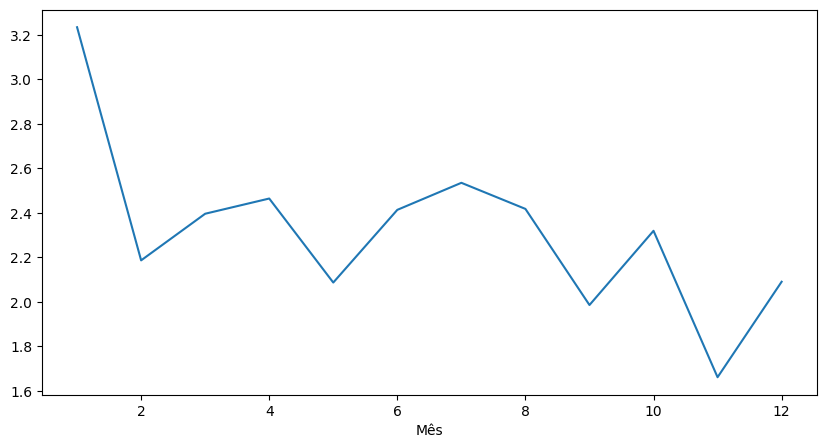

In [372]:
#Calculando a taxa de cancelamento de cada mês
taxa_cancelamentos=(cancelamentos_2011/transacoes_2011)*100
#Gráfico de Taxa de Cancelamentos
print(f'Taxa de cancelamento = {taxa_cancelamentos.plot(figsize=(10,5))}')

No gráfico acima, observamos que a taxa de cancelamento variou entre **1,6% e 3,2%**. Uma análise interessante seria comparar essa taxa com os dados dos anos anteriores da empresa, para verificar se essa variação é consistente ao longo do tempo.

Como não temos acesso a essas informações, deixo essa sugestão para análises futuras e seguirei examinando os 10 produtos com maior número de cancelamentos em cada mês.

Essa análise nos permitirá identificar os produtos que mais recebem solicitações de cancelamento ao longo do ano e aqueles com cancelamentos mais recentes. Essa informação é crucial para **prever quais produtos podem apresentar problemas de devolução nos próximos meses**.

Através do código abaixo, vamos identificar os produtos que figuraram entre os 10 mais cancelados em pelo menos dois meses. Assim, será possível destacar os produtos com maior frequência de cancelamentos ao longo do ano.

In [373]:
#1. Filtrando dados do ano de 2011
produtos_cancelados=loja[(loja['Ano'] == 2011)]
#2. Filtrando dados de cancelamento
produtos_cancelados=produtos_cancelados[produtos_cancelados['InvoiceNo'].str.startswith('C')]
#3. Selecionando colunas e agrupando dados
produtos_cancelados=produtos_cancelados[['StockCode','Mês','Quantity']].groupby(['Mês', 'StockCode']).sum().reset_index()
#4. Ordenando a coluna "Quantity" em ordem crescente, pois tratam-se de números negativos
produtos_cancelados=produtos_cancelados.sort_values('Quantity')
#5. Selecionando os 10 produtos com maior número de cancelamentos em cada mês
top10_cancelados=[]
for i in range(1,13):
  top10_cancelados.append(produtos_cancelados[produtos_cancelados['Mês']==i][:10])
#6. Contando os produtos que mais aparecem no TOP 10 ao longo do ano.
top10_cancelados=pd.concat(top10_cancelados).reset_index(drop=True)
cancelados_mais_frequentemente=top10_cancelados['StockCode'].value_counts()
cancelados_mais_frequentemente=cancelados_mais_frequentemente[cancelados_mais_frequentemente >= 2]
cancelados_mais_frequentemente

,count
StockCode,
M,7
85099B,3
20725,3
D,3
23166,2
21877,2
15034,2
22991,2
22992,2


Esses são os produtos mais preocupantes, pois apareceram pelo menos em dois meses (não necessariamente consecutivos) na lista dos 10 produtos mais cancelados. Entre eles, o produto que requer atenção urgente é o de código "M", que esteve nessa lista durante 7 meses.

Outra análise possível seria verificar se algum desses produtos esteve nessa lista nos meses de novembro e dezembro consecutivamente, o que indicaria uma maior probabilidade de causarem problemas no próximo ano.

No entanto, o código abaixo mostra que nenhum produto atende a esse critério.

In [374]:
top10_cancelados=top10_cancelados[['Mês','StockCode']]
cancelados_recentemente=top10_cancelados[top10_cancelados['Mês']>=11]
cancelados_recentemente['StockCode'].duplicated().sum()

0

**3.3 Quais produtos possuem a maior frequência de compras?**

Vamos responder essa pergunta trazendo uma lista com os 10 produtos com a maior frequência de compra ao longo do ano de 2011.

Para isso, vamos seguir as seguintes etapas do código abaixo:

In [375]:
#1. Filtrando dados de transações do ano de 2011
frequencia_de_compra=loja[(loja['Ano'] == 2011) & (~loja['InvoiceNo'].str.startswith('c'))]
#2. Selecionando as colunas "StockCode" e "Mês"
frequencia_de_compra=frequencia_de_compra[['StockCode','Mês']]
#3. Agrupando os dados pelo "StockCode"
frequencia_de_compra_mes=frequencia_de_compra.groupby('StockCode').value_counts().reset_index()
#4. Criando conjunto de dados que contenha os 10 produtos com a maior frequência total de compras
top10_mais_comprados=frequencia_de_compra_mes[['StockCode','count']].groupby('StockCode').sum().sort_values('count',ascending=False).head(10)
top10_mais_comprados

,count
StockCode,
85123A,1852
22423,1741
85099B,1571
47566,1386
84879,1312
20725,1289
22720,1175
POST,1127
23203,1107


Para encerrar, podemos avaliar a **distribuição de cada um desses produtos ao longo dos meses** em um gráfico de colunas, o que trará mais clareza à nossa análise.

Como seria necessário gerar 10 gráficos de colunas para avaliar todos esses produtos, deixo abaixo o código que contempla apenas o primeiro produto da lista. Caso deseje visualizar outro produto, basta substituir o "StockCode 85123A" pelo código do produto que você quer analisar.

<Axes: xlabel='Mês'>

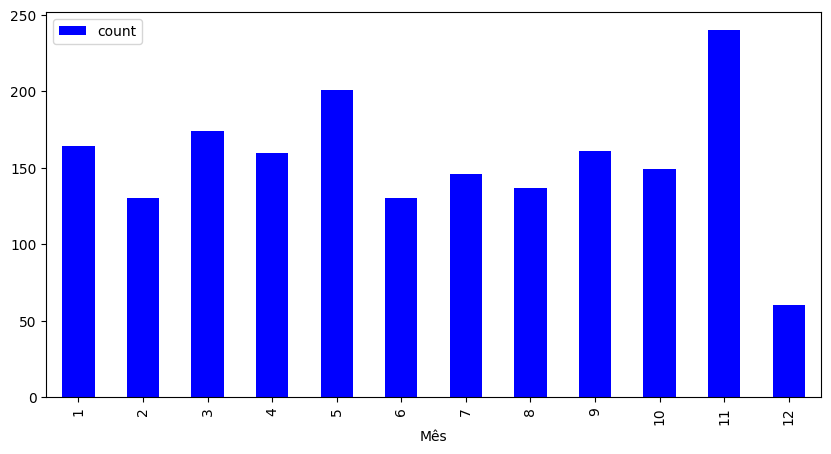

In [376]:
frequencia_de_compra_mes[frequencia_de_compra_mes['StockCode']=='85123A'].sort_values('Mês',ascending=True).plot(kind='bar',x='Mês',y='count',color='blue', figsize=(10,5))

# **4 Insights**

Para encerrar, passaremos agora à parte de conclusões e insights, onde consolidamos as observações obtidas ao longo das análises. Este é um momento fundamental, pois é aqui que traduzimos os dados em respostas concretas para as perguntas iniciais, oferecendo informações acionáveis para a empresa.

Dito isso, segue abaixo uma lista de recomendações para esta empresa, extraídas a partir dos dados analisados:

- **Estudar a sazonalidade e eventos de novembro:** Verificar se a empresa promove alguma campanha especial ou participa de eventos sazonais, como Black Friday. Isso pode explicar o aumento de transações em novembro.
- **Analisar dezembro em comparação com anos anteriores:** A queda em dezembro pode ser um comportamento sazonal ou devido a fatores específicos daquele ano. Comparar com o mesmo período em anos anteriores ajudaria a confirmar ou esclarecer o padrão.
- **Revisar as estratégias de retenção de clientes:** Caso a queda em dezembro seja algo padrão, sugiro que a empresa analise a possibilidade de campanhas de fidelização ou promoções no início de dezembro para mitigar a queda nas transações ao final do ano.
- **Considerar fatores externos e operacionais:** Questões como dificuldades logísticas, estoques, ou até mesmo mudanças de comportamento de compra após eventos como Black Friday podem influenciar a queda em dezembro.
- **Verificar os cancelamentos frequentes:** Examinar os produtos com maior frequência de cancelamento para verificar se há padrões. Alguns itens podem ser devolvidos mais frequentemente devido a questões de qualidade ou descrição incorreta.
- **Análise de Tendência Anual:** Comparar a taxa de cancelamento anual para ver se esse comportamento é consistente ao longo dos anos. Isso pode indicar se a taxa de cancelamento de 1,6% a 3,2% é uma média normal ou se algo impactou especificamente o ano em questão.

